In [ ]:
# --- Install & Import Necessary Libraries ---

# (Seaborn is optional, but helpful for nicer plots)
!pip install seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
plt.style.use("seaborn-v0_8")
sns.set_theme()

print("Libraries imported successfully!")


Libraries imported successfully!


In [ ]:
# --- Load the Instagram Analytics Dataset ---

df = pd.read_csv("instagram_analytics.csv")

# Display the first few rows to confirm it's loaded correctly
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'instagram_analytics.csv'

In [3]:
import os

print(os.listdir())


['.config', 'Instagram_Analytics.csv', 'sample_data']


In [4]:
df = pd.read_csv("Instagram_Analytics.csv")
df.head()


,post_id,upload_date,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,engagement_rate,content_category
0,IG0000001,2024-11-30 09:25:22.954916,Reel,31627,7559,4530,6393,615036,1007750,1340,3,899,Home Feed,4.97,Technology
1,IG0000002,2025-08-15 09:25:22.954916,Photo,63206,3490,1680,6809,1237071,1345900,1351,20,805,Hashtags,5.59,Fitness
2,IG0000003,2025-09-11 09:25:22.954916,Reel,94373,3727,1761,8367,1127470,1305369,242,24,758,Reels Feed,8.29,Beauty
3,IG0000004,2025-09-18 09:25:22.954916,Reel,172053,7222,2875,9290,764030,897874,446,11,402,External,21.32,Music
4,IG0000005,2025-03-21 09:25:22.954916,Video,99646,2703,4444,9746,7004,495406,1905,8,155,Profile,23.52,Technology


In [5]:
# --- Basic Dataset Exploration ---

print("Shape of dataset:", df.shape)  # number of rows & columns
print("\nColumn names:\n", df.columns.to_list())

print("\nDataset info:")
df.info()

print("\nSummary statistics (numeric columns):")
df.describe()


Shape of dataset: (29999, 15)

Column names:
 ['post_id', 'upload_date', 'media_type', 'likes', 'comments', 'shares', 'saves', 'reach', 'impressions', 'caption_length', 'hashtags_count', 'followers_gained', 'traffic_source', 'engagement_rate', 'content_category']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_id           29999 non-null  object 
 1   upload_date       29999 non-null  object 
 2   media_type        29999 non-null  object 
 3   likes             29999 non-null  int64  
 4   comments          29999 non-null  int64  
 5   shares            29999 non-null  int64  
 6   saves             29999 non-null  int64  
 7   reach             29999 non-null  int64  
 8   impressions       29999 non-null  int64  
 9   caption_length    29999 non-null  int64  
 10  hashtags_count    29999 non-null  int64  
 

,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,engagement_rate
count,29999.000000,29999.000000,29999.000000,29999.000000,2.999900e+04,2.999900e+04,29999.000000,29999.000000,29999.000000,29999.000000
mean,99912.661789,5017.781426,2502.912564,7490.124637,9.965616e+05,1.246669e+06,1103.110904,14.887430,502.152805,14.419276
std,57905.967401,2888.404881,1448.320395,4352.546949,5.777906e+05,5.970924e+05,635.991308,9.005811,290.364038,29.660210
min,7.000000,0.000000,0.000000,0.000000,1.650000e+02,5.107000e+03,0.000000,0.000000,0.000000,0.120000
25%,49755.000000,2530.500000,1246.000000,3690.500000,4.936810e+05,7.469585e+05,555.000000,7.000000,251.000000,5.180000
50%,99580.000000,5042.000000,2498.000000,7483.000000,9.921810e+05,1.241026e+06,1100.000000,15.000000,501.000000,9.190000
75%,150225.000000,7518.000000,3768.000000,11294.000000,1.494798e+06,1.749264e+06,1656.000000,23.000000,755.000000,15.670000
max,200000.000000,10000.000000,5000.000000,15000.000000,1.999865e+06,2.497940e+06,2200.000000,30.000000,1000.000000,3259.820000


In [6]:
# --- Data Cleaning & Feature Engineering ---

# 1. Convert date column to datetime (if present)
date_columns = [col for col in df.columns if "date" in col.lower()]

if len(date_columns) > 0:
    df[date_columns[0]] = pd.to_datetime(df[date_columns[0]], errors="coerce")
    print(f"Converted '{date_columns[0]}' to datetime.")
else:
    print("No date column found — continuing without date conversion.")

# 2. Create Engagement Rate if columns exist
engagement_components = ["likes", "comments", "shares", "saves", "impressions", "reach"]

available = [col for col in df.columns if col.lower() in engagement_components]

if all(col in df.columns for col in ["likes", "comments", "impressions"]):
    df["engagement_rate"] = (df["likes"] + df["comments"]) / df["impressions"].replace(0, 1)
    print("Engagement rate created using: (likes + comments) / impressions")
else:
    print("Not enough columns to create engagement_rate.")

# 3. Extract day of week and hour if a datetime column exists
if len(date_columns) > 0:
    df["day_of_week"] = df[date_columns[0]].dt.day_name()
    df["hour"] = df[date_columns[0]].dt.hour
    print("Created 'day_of_week' and 'hour' columns.")

# 4. Check for missing values
print("\nMissing values per column:")
print(df.isna().sum())


Converted 'upload_date' to datetime.
Engagement rate created using: (likes + comments) / impressions
Created 'day_of_week' and 'hour' columns.

Missing values per column:
post_id             0
upload_date         0
media_type          0
likes               0
comments            0
shares              0
saves               0
reach               0
impressions         0
caption_length      0
hashtags_count      0
followers_gained    0
traffic_source      0
engagement_rate     0
content_category    0
day_of_week         0
hour                0
dtype: int64


In [7]:
# --- Top Performing Posts by Engagement Rate ---

# Only run if engagement_rate exists
if "engagement_rate" in df.columns:
    top_posts = df.sort_values("engagement_rate", ascending=False).head(10)
    print("\nTop 10 Posts by Engagement Rate:")
    display(top_posts)
else:
    print("No engagement_rate column available. Cannot compute top posts.")



Top 10 Posts by Engagement Rate:


,post_id,upload_date,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,engagement_rate,content_category,day_of_week,hour
9040,IG0009041,2025-04-23 09:25:22.954916,Video,156126,9259,668,426,3228,5107,2079,0,261,Profile,32.383983,Beauty,Wednesday,9
23986,IG0023987,2025-03-23 09:25:22.954916,Reel,121134,8597,3004,2164,10321,10787,1723,14,311,Home Feed,12.026606,Fashion,Sunday,9
18724,IG0018725,2024-11-27 09:25:22.954916,Carousel,185597,8539,2025,2581,6398,19335,1070,21,269,Home Feed,10.040652,Music,Wednesday,9
23301,IG0023302,2025-06-01 09:25:22.954916,Photo,167914,8084,2445,3215,20106,26736,877,29,364,Explore,6.582810,Comedy,Sunday,9
27285,IG0027286,2025-03-27 09:25:22.954916,Carousel,192824,8704,731,6774,2713,32466,582,27,811,External,6.207355,Technology,Thursday,9
29336,IG0029337,2025-01-04 09:25:22.954916,Reel,164260,2640,3108,3380,9018,29734,47,0,789,Hashtags,5.613103,Fitness,Saturday,9
4022,IG0004023,2025-07-17 09:25:22.954916,Photo,177856,2771,3132,14457,30064,37550,1931,10,522,Home Feed,4.810306,Music,Thursday,9
22016,IG0022017,2025-08-02 09:25:22.954916,Reel,165844,4681,4480,9117,25737,37320,1213,22,434,Explore,4.569266,Photography,Saturday,9
20840,IG0020841,2025-05-06 09:25:22.954916,Carousel,197587,2030,2050,1404,16207,44869,2010,9,397,Explore,4.448885,Technology,Tuesday,9
18326,IG0018327,2025-02-05 09:25:22.954916,Reel,79989,9030,987,11271,18310,20295,407,17,414,Reels Feed,4.386253,Music,Wednesday,9


In [8]:
# --- Engagement Rate by Content Type ---

if "content_type" in df.columns:
    content_perf = df.groupby("content_type")["engagement_rate"].mean().sort_values(ascending=False)

    print("Average Engagement Rate by Content Type:\n")
    display(content_perf)

    # Plot
    plt.figure(figsize=(8,5))
    sns.barplot(x=content_perf.index, y=content_perf.values)
    plt.title("Average Engagement Rate by Content Type")
    plt.ylabel("Engagement Rate")
    plt.xlabel("Content Type")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'content_type' not found in dataset.")


Column 'content_type' not found in dataset.


In [9]:
df.columns


Index(['post_id', 'upload_date', 'media_type', 'likes', 'comments', 'shares',
       'saves', 'reach', 'impressions', 'caption_length', 'hashtags_count',
       'followers_gained', 'traffic_source', 'engagement_rate',
       'content_category', 'day_of_week', 'hour'],
      dtype='object')

Average Engagement Rate by Media Type:



,engagement_rate
media_type,
Video,0.133622
Reel,0.132946
Carousel,0.130709
Photo,0.129601


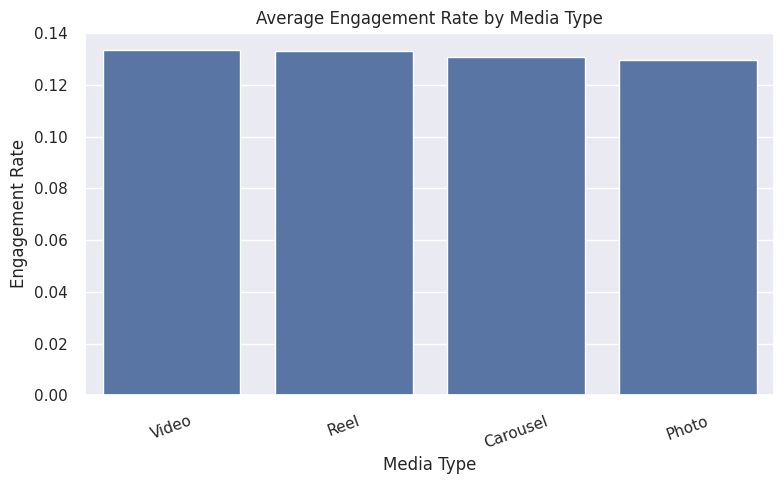

In [10]:
# --- Engagement Rate by Media Type ---

content_perf = (
    df.groupby("media_type")["engagement_rate"]
    .mean()
    .sort_values(ascending=False)
)

print("Average Engagement Rate by Media Type:\n")
display(content_perf)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=content_perf.index, y=content_perf.values)
plt.title("Average Engagement Rate by Media Type")
plt.ylabel("Engagement Rate")
plt.xlabel("Media Type")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


Average Engagement Rate by Day of Week:



,engagement_rate
day_of_week,
Monday,0.130212
Tuesday,0.127561
Wednesday,0.138751
Thursday,0.129233
Friday,0.129433
Saturday,0.135144
Sunday,0.131741


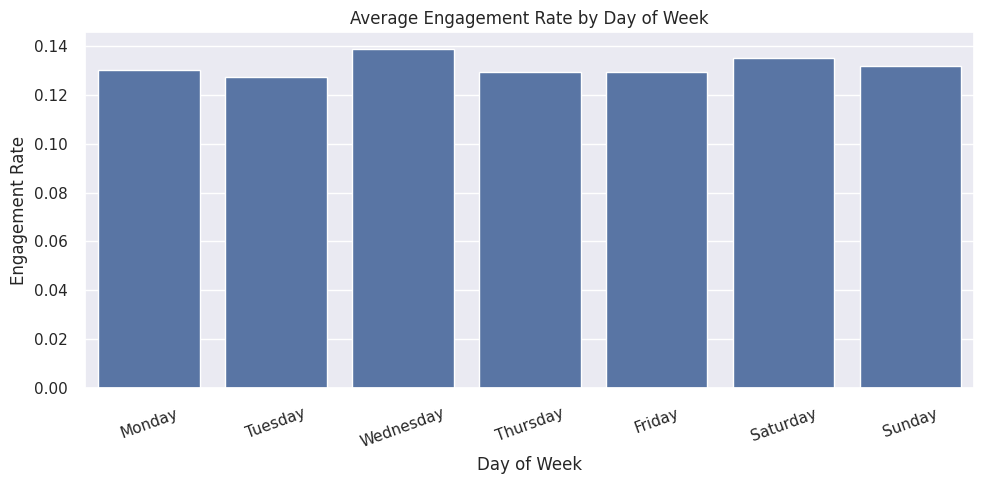

In [11]:
# --- Engagement Rate by Day of Week ---

if "day_of_week" in df.columns:
    day_perf = (
        df.groupby("day_of_week")["engagement_rate"]
        .mean()
        .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])  # ordered days
    )

    print("Average Engagement Rate by Day of Week:\n")
    display(day_perf)

    # Plot
    plt.figure(figsize=(10,5))
    sns.barplot(x=day_perf.index, y=day_perf.values)
    plt.title("Average Engagement Rate by Day of Week")
    plt.ylabel("Engagement Rate")
    plt.xlabel("Day of Week")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'day_of_week' not found in dataset.")


Average Engagement Rate by Posting Hour:



,engagement_rate
hour,
9,0.131725


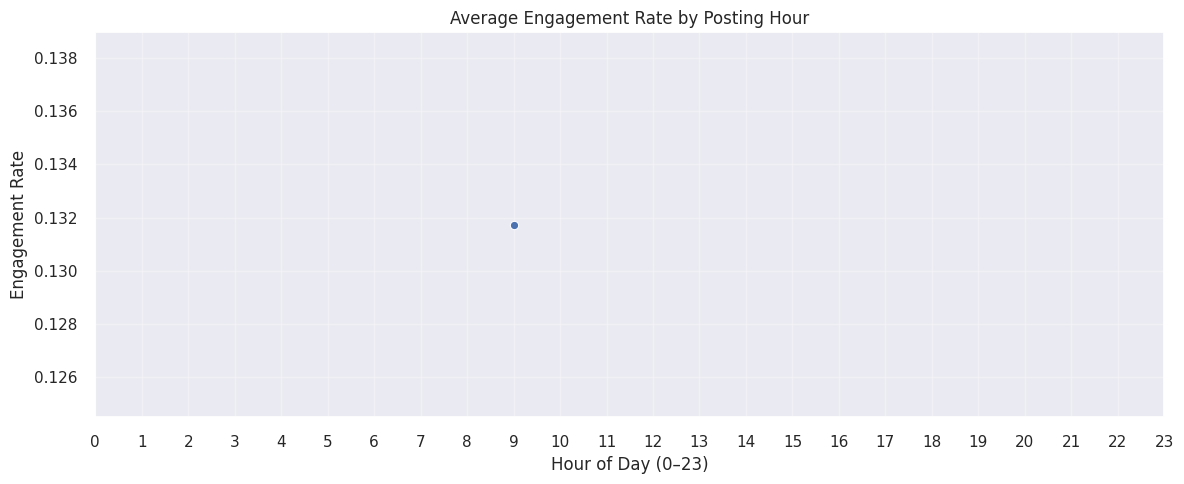

In [12]:
# --- Engagement Rate by Posting Hour ---

if "hour" in df.columns:
    hour_perf = (
        df.groupby("hour")["engagement_rate"]
        .mean()
        .sort_index()
    )

    print("Average Engagement Rate by Posting Hour:\n")
    display(hour_perf)

    # Plot
    plt.figure(figsize=(12,5))
    sns.lineplot(x=hour_perf.index, y=hour_perf.values, marker="o")
    plt.title("Average Engagement Rate by Posting Hour")
    plt.ylabel("Engagement Rate")
    plt.xlabel("Hour of Day (0–23)")
    plt.xticks(range(0, 24))
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'hour' not found in dataset.")


Average Engagement Rate by Content Category:



,engagement_rate
content_category,
Beauty,0.144256
Photography,0.135569
Lifestyle,0.133761
Fashion,0.132682
Music,0.132178
Comedy,0.131712
Food,0.127789
Technology,0.127191
Fitness,0.126814


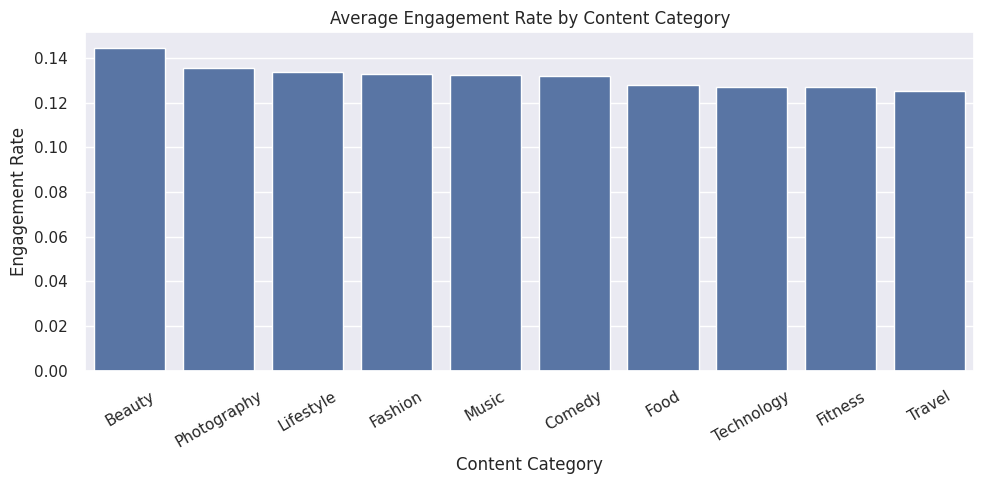

In [13]:
# --- Engagement Rate by Content Category ---

if "content_category" in df.columns:
    category_perf = (
        df.groupby("content_category")["engagement_rate"]
        .mean()
        .sort_values(ascending=False)
    )

    print("Average Engagement Rate by Content Category:\n")
    display(category_perf)

    # Plot
    plt.figure(figsize=(10,5))
    sns.barplot(x=category_perf.index, y=category_perf.values)
    plt.title("Average Engagement Rate by Content Category")
    plt.ylabel("Engagement Rate")
    plt.xlabel("Content Category")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'content_category' not found in dataset.")



Average Followers Gained by Media Type:



,followers_gained
media_type,
Photo,505.305582
Carousel,504.675525
Video,504.456201
Reel,494.201331


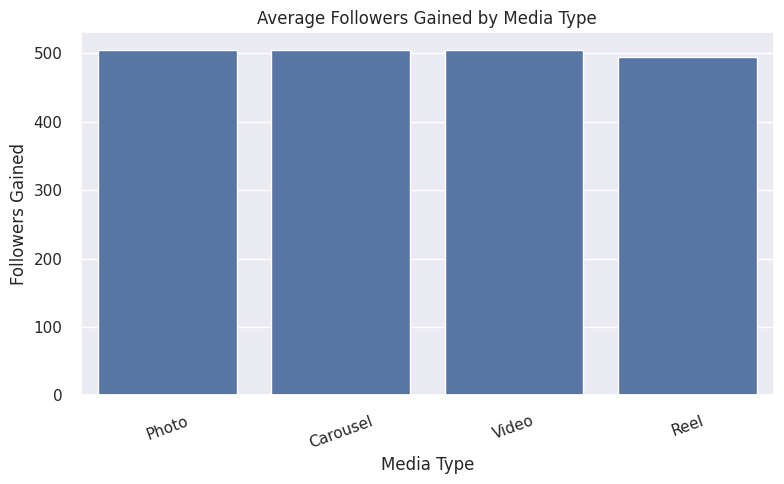


Average Followers Gained by Content Category:



,followers_gained
content_category,
Music,512.873793
Lifestyle,508.992377
Beauty,505.479512
Photography,503.241516
Food,503.049502
Travel,503.033019
Comedy,498.470508
Fashion,497.576796
Fitness,497.250000


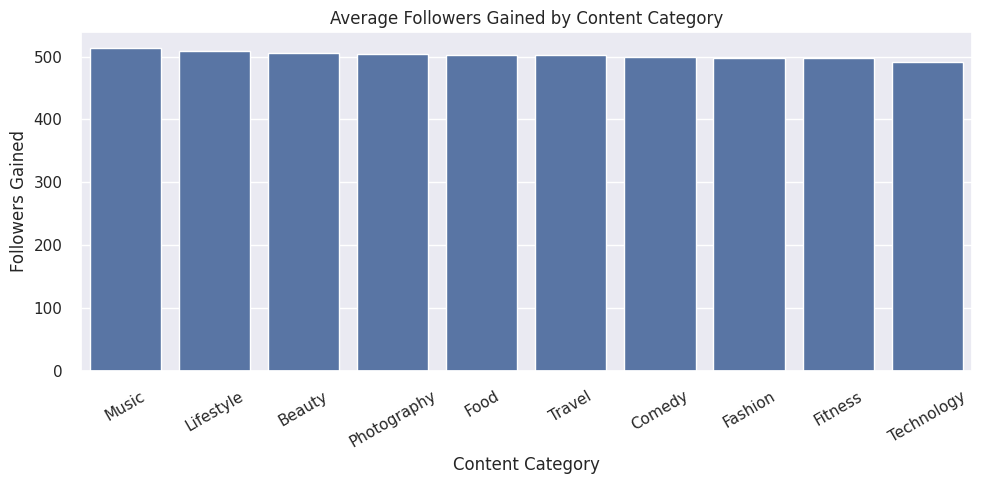

In [14]:
# --- Follower Growth Analysis ---

if "followers_gained" in df.columns:

    # 1. Followers gained by media type
    print("\nAverage Followers Gained by Media Type:\n")
    fg_media = df.groupby("media_type")["followers_gained"].mean().sort_values(ascending=False)
    display(fg_media)

    plt.figure(figsize=(8,5))
    sns.barplot(x=fg_media.index, y=fg_media.values)
    plt.title("Average Followers Gained by Media Type")
    plt.ylabel("Followers Gained")
    plt.xlabel("Media Type")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()

    # 2. Followers gained by content category
    print("\nAverage Followers Gained by Content Category:\n")
    fg_category = df.groupby("content_category")["followers_gained"].mean().sort_values(ascending=False)
    display(fg_category)

    plt.figure(figsize=(10,5))
    sns.barplot(x=fg_category.index, y=fg_category.values)
    plt.title("Average Followers Gained by Content Category")
    plt.ylabel("Followers Gained")
    plt.xlabel("Content Category")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

else:
    print("Column 'followers_gained' not found in dataset.")


In [15]:
# --- Automatic Marketing Report ---

print("=== 📊 Instagram Performance Insights Report ===\n")

# 1. Best Media Type
if "media_type" in df.columns:
    best_media = df.groupby("media_type")["engagement_rate"].mean().idxmax()
    print(f"⭐ Best Performing Media Type: {best_media}")
else:
    print("Media type column missing.")

# 2. Best Day of Week
if "day_of_week" in df.columns:
    best_day = df.groupby("day_of_week")["engagement_rate"].mean().idxmax()
    print(f"⭐ Best Day to Post: {best_day}")
else:
    print("Day of week column missing.")

# 3. Best Hour
if "hour" in df.columns:
    best_hour = df.groupby("hour")["engagement_rate"].mean().idxmax()
    print(f"⭐ Best Posting Hour: {best_hour}:00")
else:
    print("Hour column missing.")

# 4. Best Content Category
if "content_category" in df.columns:
    best_category = df.groupby("content_category")["engagement_rate"].mean().idxmax()
    print(f"⭐ Top Performing Content Category: {best_category}")
else:
    print("Content category column missing.")

# 5. Highest Follower Growth Media Type
if "followers_gained" in df.columns:
    top_fg_media = df.groupby("media_type")["followers_gained"].mean().idxmax()
    print(f"⭐ Media Type That Gains the Most Followers: {top_fg_media}")

    top_fg_category = df.groupby("content_category")["followers_gained"].mean().idxmax()
    print(f"⭐ Category That Gains the Most Followers: {top_fg_category}")
else:
    print("Follower gain column missing.")

# 6. Top Post
if "engagement_rate" in df.columns:
    top_post = df.sort_values("engagement_rate", ascending=False).head(1)
    print("\n🔥 Highest-Performing Post Details:")
    display(top_post)
else:
    print("Cannot compute top post.")


=== 📊 Instagram Performance Insights Report ===

⭐ Best Performing Media Type: Video
⭐ Best Day to Post: Wednesday
⭐ Best Posting Hour: 9:00
⭐ Top Performing Content Category: Beauty
⭐ Media Type That Gains the Most Followers: Photo
⭐ Category That Gains the Most Followers: Music

🔥 Highest-Performing Post Details:


,post_id,upload_date,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,engagement_rate,content_category,day_of_week,hour
9040,IG0009041,2025-04-23 09:25:22.954916,Video,156126,9259,668,426,3228,5107,2079,0,261,Profile,32.383983,Beauty,Wednesday,9


In [16]:
# --- Save Key Visualizations as PNG Files ---

import os

# Create a folder to store the exported images
os.makedirs("plots", exist_ok=True)

# 1. Engagement Rate by Media Type
content_perf = df.groupby("media_type")["engagement_rate"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=content_perf.index, y=content_perf.values)
plt.title("Average Engagement Rate by Media Type")
plt.ylabel("Engagement Rate")
plt.xlabel("Media Type")
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig("plots/engagement_by_media_type.png")
plt.close()


# 2. Engagement Rate by Day of Week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

day_perf = (
    df.groupby("day_of_week")["engagement_rate"]
    .mean()
    .reindex(day_order)
)

plt.figure(figsize=(10,5))
sns.barplot(x=day_perf.index, y=day_perf.values)
plt.title("Average Engagement Rate by Day of Week")
plt.ylabel("Engagement Rate")
plt.xlabel("Day of Week")
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig("plots/engagement_by_day.png")
plt.close()


# 3. Engagement Rate by Posting Hour
hour_perf = df.groupby("hour")["engagement_rate"].mean().sort_index()

plt.figure(figsize=(12,5))
sns.lineplot(x=hour_perf.index, y=hour_perf.values, marker="o")
plt.title("Average Engagement Rate by Posting Hour")
plt.ylabel("Engagement Rate")
plt.xlabel("Hour of Day")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("plots/engagement_by_hour.png")
plt.close()


# 4. Engagement Rate by Content Category
category_perf = df.groupby("content_category")["engagement_rate"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=category_perf.index, y=category_perf.values)
plt.title("Average Engagement Rate by Content Category")
plt.ylabel("Engagement Rate")
plt.xlabel("Content Category")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("plots/engagement_by_category.png")
plt.close()

print("All visualizations saved in the 'plots' folder!")


All visualizations saved in the 'plots' folder!


In [17]:
import shutil

# Create a ZIP file of the 'plots' folder
shutil.make_archive("instagram_plots", "zip", "plots")
print("Zipped plots folder -> instagram_plots.zip")


Zipped plots folder -> instagram_plots.zip
